In [34]:
from math import sqrt,pi
import numpy as np
from scipy.special import erfc,erfcx
import matplotlib.pyplot as plt

In [37]:
def kt(ka,D,t):
    h=ka/D
    B = h*h*D*t
    return ka*erfcx(np.sqrt(B))


1.6666666666666667e-05 1.6666666666666668e-07 0.016666666666666666


Text(0.5,0,'t')

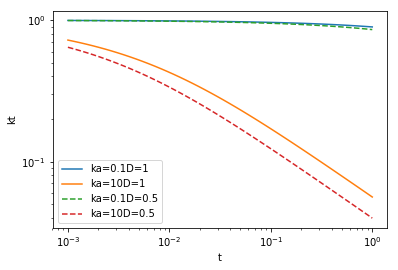

In [84]:
D=1
rm = 0.005
l=2*rm
tm = l*l/6/D
print(tm,tm/100,tm*1000)
T=np.logspace(-3,0,50)
kas=[0.1,10]
for ka in kas:
    k=kt(ka,D,T)/ka
    plt.semilogx(T,k,label='ka='+str(ka)+'D='+str(D))
klong = np.sqrt(D/pi/T)
#plt.loglog(T,klong,'r--')
#plt.loglog(T,klong/sqrt(2),'g--')
for ka in kas:
    k=kt(ka,D*0.5,T)/ka
    plt.loglog(T,k,'--',label='ka='+str(ka)+'D='+str(D*0.5))
plt.legend()
plt.ylabel('kt')
plt.xlabel('t')

Text(0.5,0,'t')

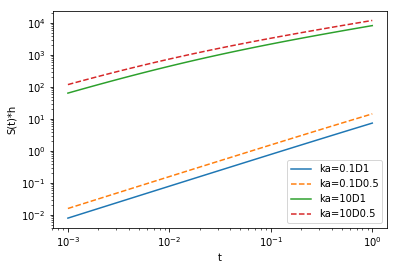

In [86]:
def St(t,ka,D):
    h = ka/D
    B=h*np.sqrt(D*t)
    return 800*(erfcx(B)-1+2*h*np.sqrt(D*t/pi))#/h

for ka in kas:
    S = St(T,ka,D)
    plt.semilogx(T,S,label='ka='+str(ka)+'D'+str(D))
    S = St(T,ka,D*0.5)
    plt.loglog(T,S,'--',label='ka='+str(ka)+'D'+str(D*0.5))    
plt.legend()
plt.ylabel('S(t)*h')
plt.xlabel('t')
#plt.xlim(1e-2,1)
#plt.ylim(0,100)

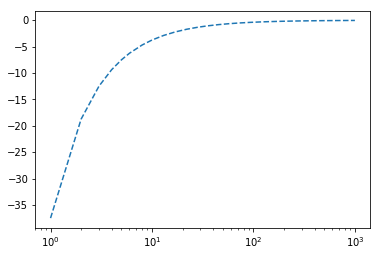

In [103]:
N = np.unique([int(n) for n in np.logspace(0,3,30)])
P=1
hn1 = lambda n: (sqrt(2)/P)*(0.5)/np.sqrt(pi*n**3)
hn2 = lambda n: (sqrt(2)/P)*(0.5+3/16/n)/np.sqrt(pi*n**3)
diff = (hn1(N)-hn2(N))*100/hn1(N)
#plt.semilogx(N,hn1(N),'-')
plt.semilogx(N,diff,'--')